In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


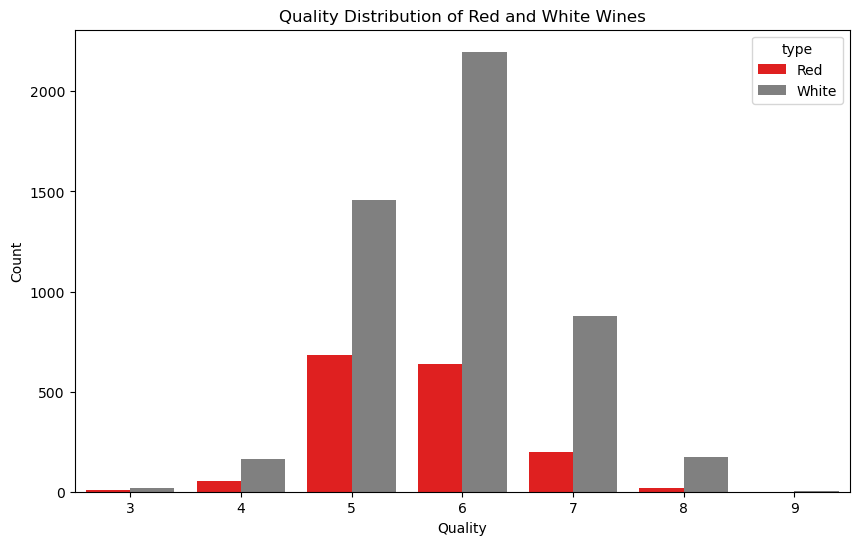

In [2]:
# Load the datasets
df_red_wine = pd.read_csv('winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to distinguish between red and white wine
df_red_wine['type'] = 'Red'
df_white_wine['type'] = 'White'

# Concatenate the dataframes
df = pd.concat([df_red_wine, df_white_wine])

# Plot the quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df, palette={'Red': 'red', 'White': 'grey'})
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution of Red and White Wines')
plt.show()

In [3]:
print(df_red_wine['quality'].value_counts())
df_white_wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [4]:
datasets_list = [df_red_wine, df_white_wine]

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
scaled_datasets = []

for dataset in datasets_list:
    # Define the features
    X = dataset.drop(['quality', 'type'], axis=1)

    # Define the target
    y = dataset['quality']

    scaled_X = scaler.fit_transform(X)
    scaled_dataset = pd.DataFrame(data=scaled_X, columns=X.columns)
    scaled_dataset['quality'] = y.values
    scaled_datasets.append(scaled_dataset)


scaled_datasets[0].head()
    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


In [6]:
# Test correlation on the first scaled dataset
correlation_matrix = scaled_datasets[0].corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
from sklearn.utils import resample

# Function to downsample the majority class
def downsample_majority_class(dataset):
    # Separate majority and minority classes
    majority_class_label = dataset['quality'].mode()[0]
    minority_class = dataset[dataset['quality'] != majority_class_label]
    majority_class = dataset[dataset['quality'] == majority_class_label]

    # Downsample majority class
    n_samples = min(len(minority_class), len(majority_class))
    majority_class_downsampled = resample(majority_class,
                                          replace=False,  # sample without replacement
                                          n_samples=n_samples,  # to match minority class
                                          random_state=42)  # reproducible results

    # Combine minority class with downsampled majority class
    downsampled_dataset = pd.concat([minority_class, majority_class_downsampled])

    return downsampled_dataset

# Downsample the majority class in both datasets
downsampled_datasets = [downsample_majority_class(dataset) for dataset in scaled_datasets]

In [8]:
print(df_red_wine['quality'].value_counts())
df_white_wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [9]:
for i in range(2):
    print(downsampled_datasets[i]['quality'].value_counts())
    


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=423)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Function to evaluate a model with cross-validation
def cross_validate_model(model, X, y):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    return scores

# Evaluate models on original scaled datasets
base_metrics = []
for dataset in scaled_datasets:
    X = dataset.drop('quality', axis=1)
    y = dataset['quality']
    model = LogisticRegression(random_state=42)
    scores = cross_validate_model(model, X, y)
    base_metrics.append(scores)

# Evaluate models on downsampled datasets
downsampled_metrics = []
for dataset in downsampled_datasets:
    X = dataset.drop('quality', axis=1)
    y = dataset['quality']
    model = LogisticRegression(class_weight={cls: 1.0 for cls in y.unique()}, random_state=42)
    model.class_weight[y.mode()[0]] = 0.5  # Reduce the importance of the majority class
    scores = cross_validate_model(model, X, y)
    downsampled_metrics.append(scores)

# Calculate mean and std for both sets of models
base_metrics_mean = {metric: np.mean([m['test_' + metric] for m in base_metrics]) for metric in scoring.keys()}
base_metrics_std = {metric: np.std([m['test_' + metric] for m in base_metrics]) for metric in scoring.keys()}
downsampled_metrics_mean = {metric: np.mean([m['test_' + metric] for m in downsampled_metrics]) for metric in scoring.keys()}
downsampled_metrics_std = {metric: np.std([m['test_' + metric] for m in downsampled_metrics]) for metric in scoring.keys()}

# Print the results
print("Base Models Metrics (Mean ± Std):")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {base_metrics_mean[metric]:.4f} ± {base_metrics_std[metric]:.4f}")

print("\nDownsampled Models Metrics (Mean ± Std):")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {downsampled_metrics_mean[metric]:.4f} ± {downsampled_metrics_std[metric]:.4f}")

c:\Users\tyhug\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tyhug\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Base Models Metrics (Mean ± Std):
Accuracy: 0.5653 ± 0.0308
Recall: 0.5653 ± 0.0308
F1: 0.5374 ± 0.0378

Downsampled Models Metrics (Mean ± Std):
Accuracy: 0.5181 ± 0.0452
Recall: 0.5181 ± 0.0452
F1: 0.4914 ± 0.0542
